In [61]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.style as style 
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

style.use('fivethirtyeight')

In [2]:
# import regular stats
# import advanced stats

reg18 = pd.read_excel('17-18-reg1.xlsx')
reg19 = pd.read_excel('18-19-reg1.xlsx')

adv18 = pd.read_excel('17-18-adv.xlsx')
adv19 = pd.read_excel('18-19-adv.xlsx')

In [3]:
# List of players in each season
# List of players in each season that appear in each season. i.e. players in season 18 that are in 19 and vice versa.

players18 = list(reg18['Player'])
players19 = list(reg19['Player'])
playersboth18 = [x for x in players18 if x in players19]
playersboth19 = [x for x in players19 if x in players18]

playersadv18 = list(adv18['Player'])
playersadv19 = list(adv19['Player'])
playersadvboth18 = [x for x in playersadv18 if x in playersadv19]
playersadvboth19 = [x for x in playersadv19 if x in playersadv18]


In [4]:
# Dataframes with only players that appear in both seasons

players18both = reg18.loc[reg18['Player'].isin(playersboth18)]
players19both = reg19.loc[reg19['Player'].isin(playersboth19)]

playersadv18both = adv18.loc[adv18['Player'].isin(playersadvboth18)]
playersadv19both = adv19.loc[adv19['Player'].isin(playersadvboth19)]

In [5]:
# List of Players in both seasons, along with list of their corrosponding teams and minutes played in season 19

playerlist = list(players19both['Player'])
teamlist = list(players19both['Team'])
gp = list(players19both['GP'])

advplayerlist = list(playersadv19both['Player'])
advteamlist = list(playersadv19both['Tm'])
advgp = list(playersadv19both['G'])

In [6]:
# Reset Index for Both Season Dataframes

players18both.reset_index(drop=True, inplace=True)
players19both.reset_index(drop=True, inplace=True)

playersadv18both.reset_index(drop=True, inplace=True)
playersadv19both.reset_index(drop=True, inplace=True)

In [7]:
# New dataframe with the difference in stats between seasons
change = players19both.iloc[:,4:] - players18both.iloc[:,4:]

changeadv = playersadv19both.iloc[:,5:] - playersadv18both.iloc[:,5:]


In [8]:
# Add in Player, Team and GP

change.insert(0,'Player', playerlist)
change.insert(1,'Team', teamlist)
change.insert(2,'GP', gp)

changeadv.insert(0,'Player', advplayerlist)
changeadv.insert(1,'Tm', advteamlist)

In [9]:
# Remove everything after \ in adv player name
 
changeadv['Player'] = changeadv['Player'].str.split('\\', 1)

,Player,PPG
236,Derrick Rose,9.6
248,Pascal Siakam,9.6
213,Cedi Osman,9.1
55,John Collins,9.0
22,Malik Beasley,8.1
186,JaVale McGee,7.2
126,Buddy Hield,7.2
166,Zach LaVine,7.0
237,Terrence Ross,6.4
198,Emmanuel Mudiay,6.2


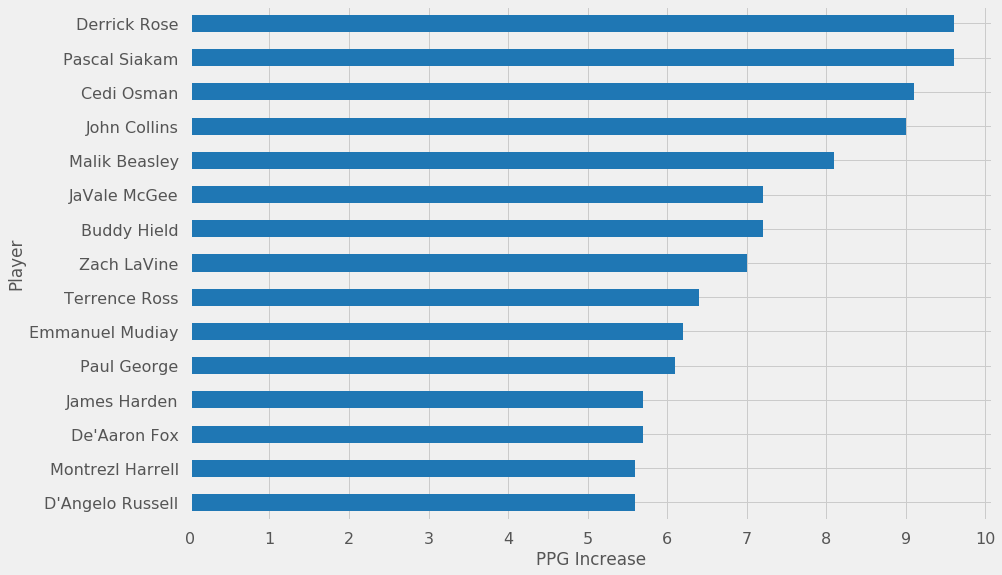

In [66]:
# Top 10 in PPG

PPG = change.sort_values('PPG', ascending=False).head(15).iloc[::-1]
PPG.plot.barh(x='Player', y='PPG', legend=None, color='tab:blue')
plt.xlabel('PPG Increase')
plt.xticks(list(range(0,11)))
# plt.grid()
plt.rc('axes', axisbelow=True)
plt.savefig('./ppg.png', dpi=300, bbox_inches='tight')

PPG[['Player','PPG']].sort_values('PPG', ascending=False)

,Player,MPG
213,Cedi Osman,21.2
22,Malik Beasley,13.8
90,Terrance Ferguson,13.6
186,JaVale McGee,12.8
107,Jerami Grant,12.4
248,Pascal Siakam,11.1
236,Derrick Rose,10.5
118,Montrezl Harrell,9.3
272,Noah Vonleh,9.1
92,Bryn Forbes,9.0


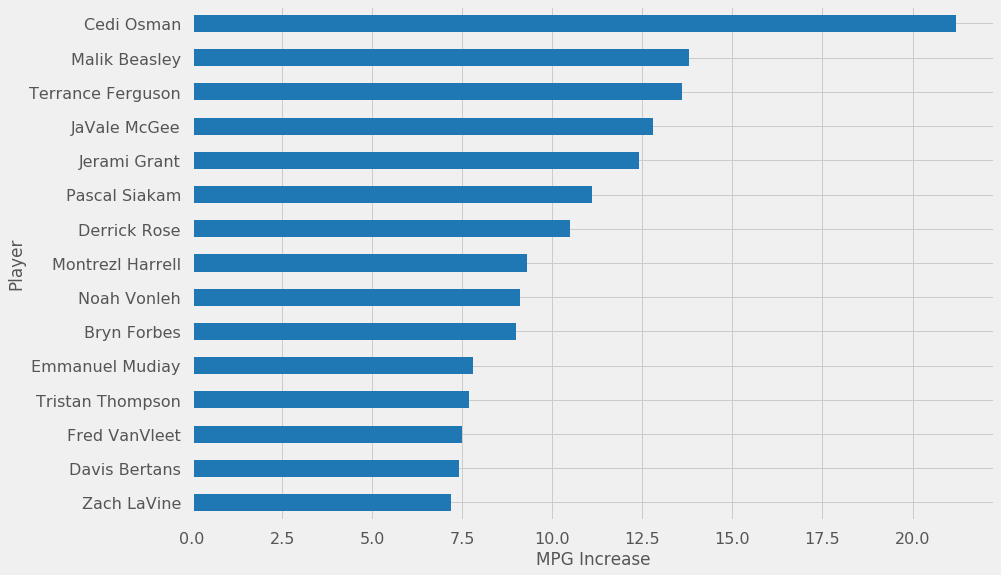

In [69]:
# Top 10 in MPG

MPG = change.sort_values('MPG', ascending=False).head(15).iloc[::-1]
MPG.plot.barh(x='Player', y='MPG', legend=None, color='tab:blue')
plt.xlabel('MPG Increase')
# plt.grid()
plt.rc('axes', axisbelow=True)
plt.savefig('./mpg.png', dpi=300, bbox_inches='tight')

MPG[['Player','MPG']].sort_values('MPG', ascending=False)


,Player,RPG
186,JaVale McGee,4.9
264,Tristan Thompson,3.6
4,Jarrett Allen,3.0
273,Nikola Vucevic,2.8
213,Cedi Osman,2.7
85,Joel Embiid,2.6
55,John Collins,2.5
7,Giannis Antetokounmpo,2.5
118,Montrezl Harrell,2.5
100,Paul George,2.5


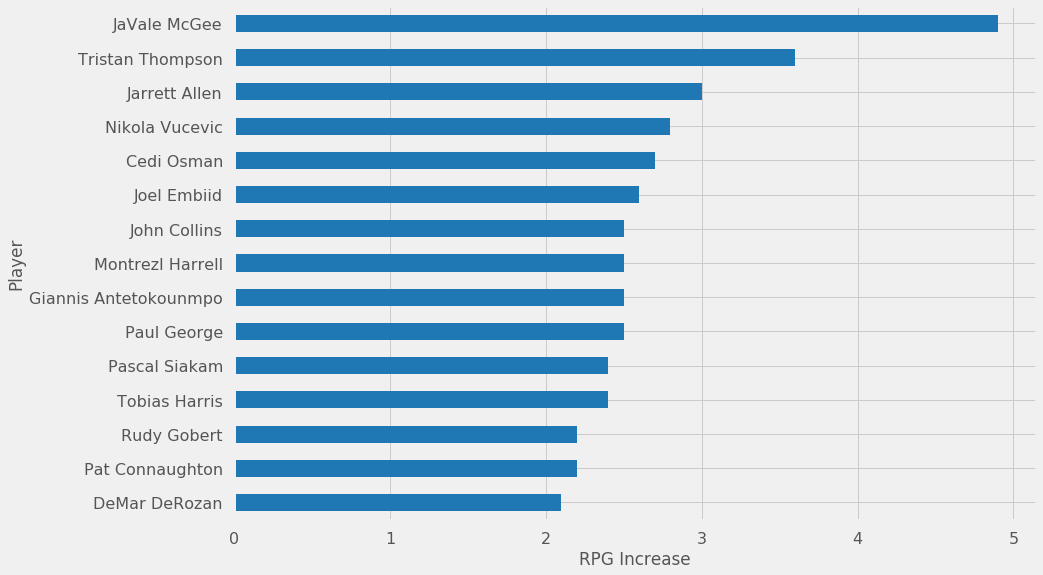

In [70]:
# Top 10 in RPG

RPG = change.sort_values('RPG', ascending=False).head(15).iloc[::-1]
RPG.plot.barh(x='Player', y='RPG', legend=None, color='tab:blue')
plt.xlabel('RPG Increase')
# plt.grid()
plt.rc('axes', axisbelow=True)
plt.savefig('./rpg.png', dpi=300, bbox_inches='tight')

RPG[['Player','RPG']].sort_values('RPG', ascending=False)

,Player,APG
94,De'Aaron Fox,2.9
236,Derrick Rose,2.8
10,Trevor Ariza,2.1
18,Jerryd Bayless,2.1
285,Justise Winslow,2.1
33,Devin Booker,2.1
202,"Larry Nance, Jr.",2.0
154,Tyus Jones,2.0
213,Cedi Osman,1.9
140,Kyrie Irving,1.8


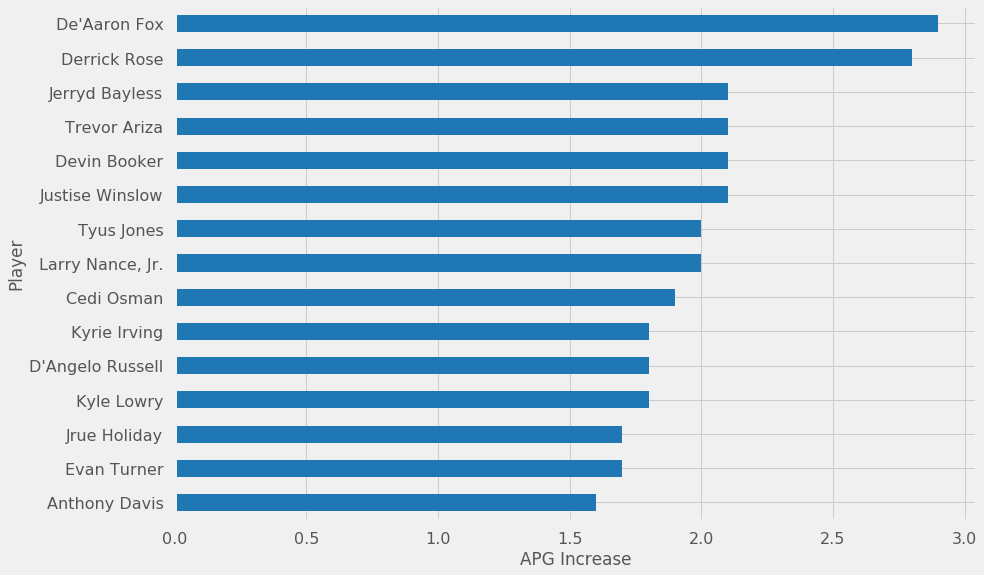

In [78]:
# Top 10 in APG

APG = change.sort_values('APG', ascending=False).head(15).iloc[::-1]
APG.plot.barh(x='Player', y='APG', legend = False, color='tab:blue')
plt.xlabel('APG Increase')
# plt.grid()
plt.rc('axes', axisbelow=True)
plt.savefig('./apg.png', dpi=300, bbox_inches='tight')

APG[['Player','APG']].sort_values('APG', ascending=False)

,Player,BPG
186,JaVale McGee,1.1
172,Brook Lopez,0.9
269,Myles Turner,0.9
118,Montrezl Harrell,0.6
131,Richaun Holmes,0.5
214,"Kelly Oubre, Jr.",0.5
272,Noah Vonleh,0.5
29,Nemanja Bjelica,0.5
161,Maxi Kleber,0.4
56,Zach Collins,0.4


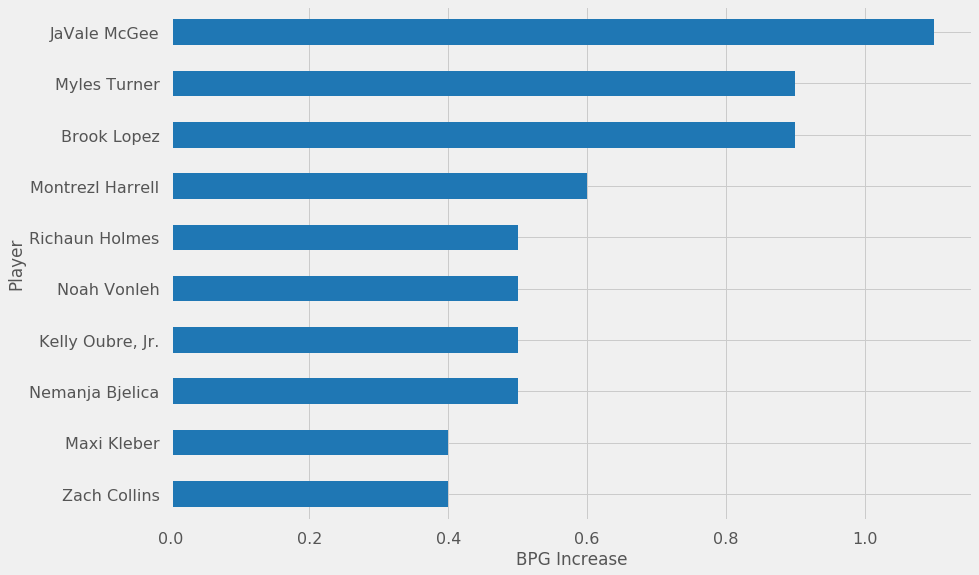

In [72]:
# Top 10 in BPG

BPG = change.sort_values('BPG', ascending=False).head(10).iloc[::-1]
BPG.plot.barh(x='Player', y='BPG', legend=None, color='tab:blue')
plt.xlabel('BPG Increase')
# plt.grid()
plt.rc('axes', axisbelow=True)
plt.savefig('./bpg.png', dpi=300, bbox_inches='tight')

BPG[['Player','BPG']].sort_values('BPG', ascending=False)

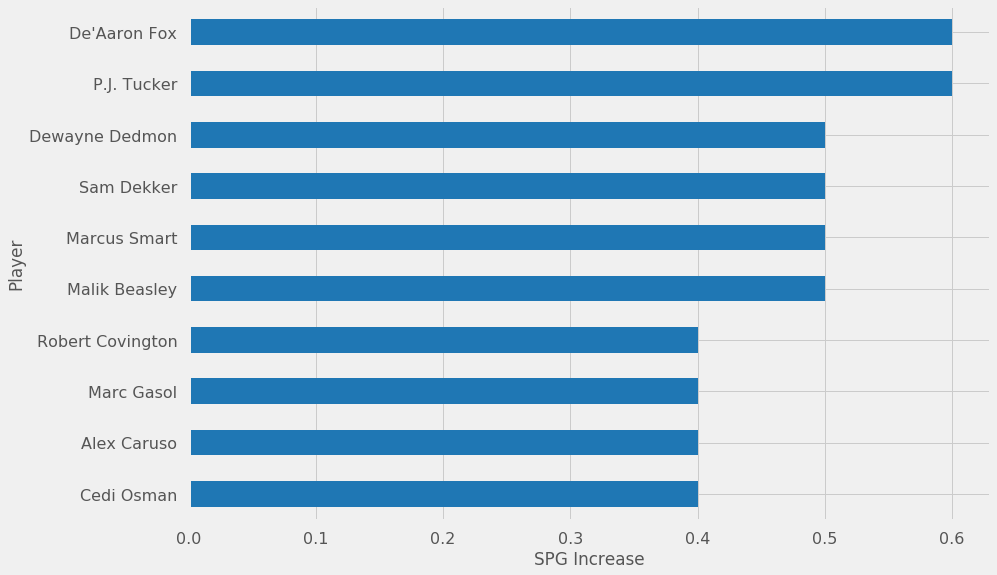

In [73]:
# Top 10 in SPG

SPG = change.sort_values('SPG', ascending=False).head(10).iloc[::-1]
SPG.plot.barh(x='Player', y='SPG', legend=None, color='tab:blue')
plt.xlabel('SPG Increase')
# plt.grid()
plt.rc('axes', axisbelow=True)
plt.savefig('./spg.png', dpi=300, bbox_inches='tight')

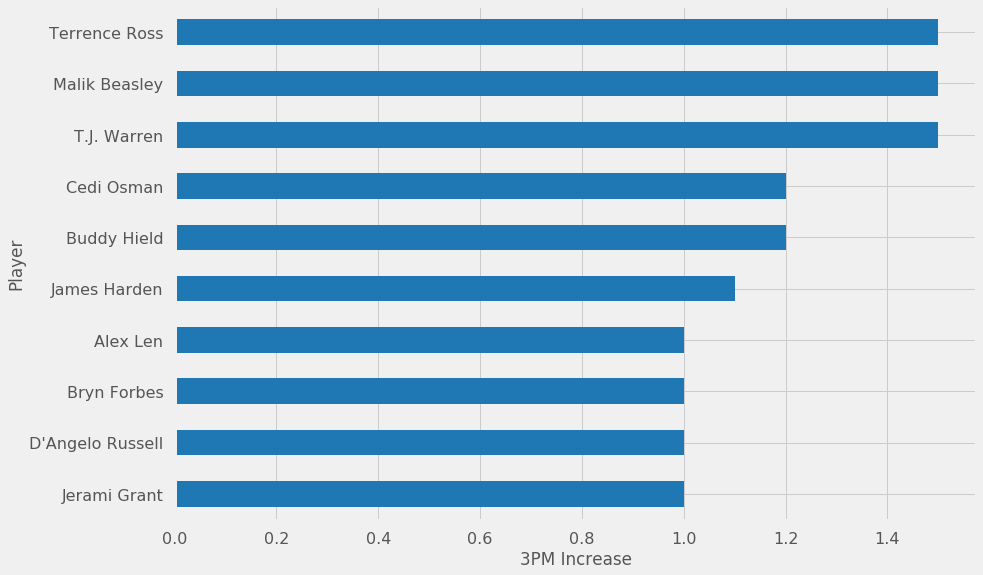

In [74]:
# Top 10 in 3PM

THREE = change.sort_values('3PM', ascending=False).head(10).iloc[::-1]
THREE.plot.barh(x='Player', y='3PM', legend=None, color='tab:blue')
plt.xlabel('3PM Increase')

# plt.grid()
plt.rc('axes', axisbelow=True)
plt.savefig('./3pm.png', dpi=300, bbox_inches='tight')

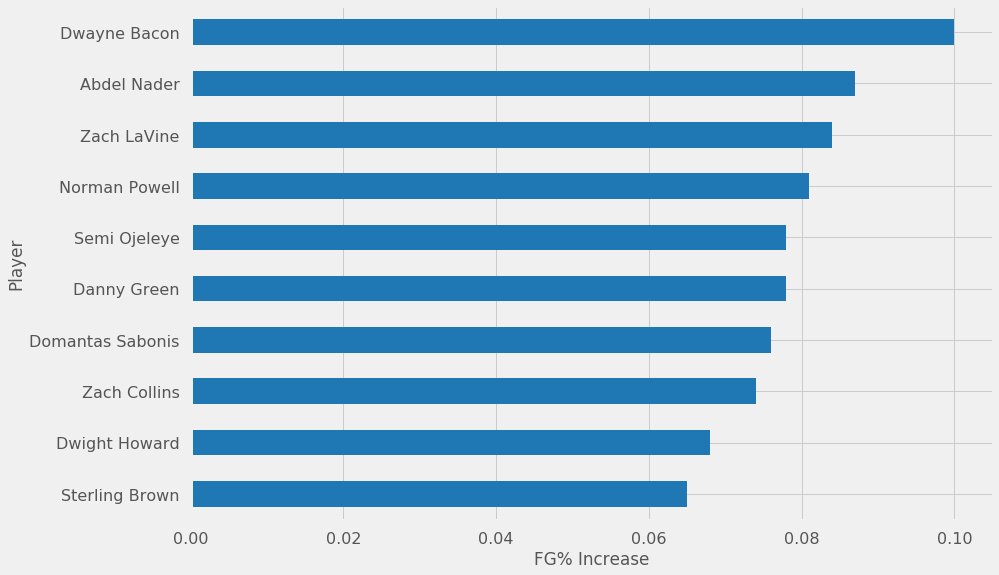

In [75]:
# Top 10 in FG%

FGP = change.sort_values('FG%', ascending=False).head(10).iloc[::-1]
FGP.plot.barh(x='Player', y='FG%', legend=None, color='tab:blue')
plt.xlabel('FG% Increase')

# plt.grid()
plt.rc('axes', axisbelow=True)
plt.savefig('./fg%.png', dpi=300, bbox_inches='tight')

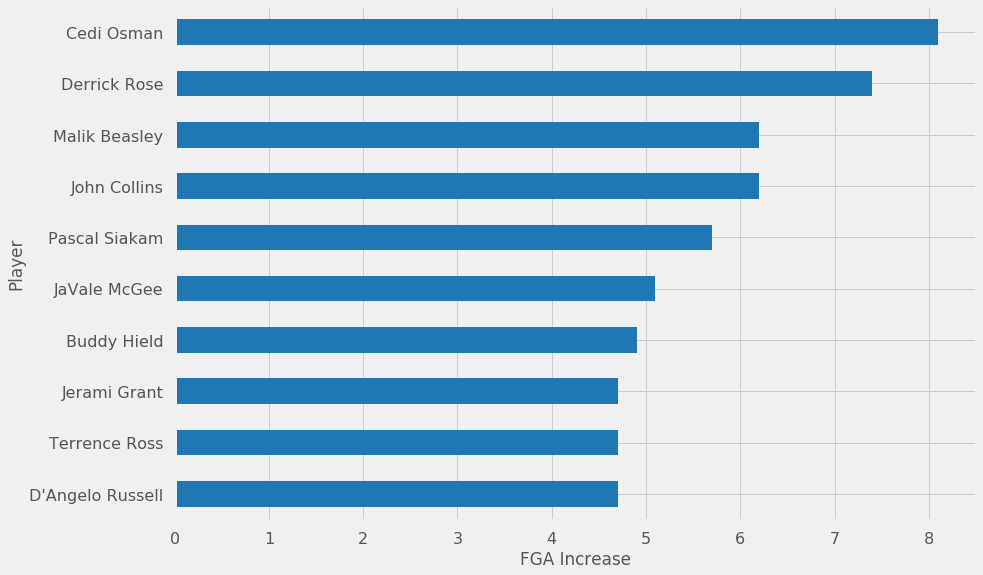

In [76]:
# Top 10 in FGA

FGA = change.sort_values('FGA', ascending=False).head(10).iloc[::-1]
FGA.plot.barh(x='Player', y='FGA', legend=None, color='tab:blue')
plt.xlabel('FGA Increase')

# plt.grid()
plt.rc('axes', axisbelow=True)
plt.savefig('./fga.png', dpi=300, bbox_inches='tight')

In [93]:
# 2019 Stats for my MIP candidates

MIP19 = players19both.iloc[[273,248,55,240,94,236]][['Player','MPG','PPG','RPG','APG','BPG','SPG','FG%','3PM','3P%']]

MIP19['PER'] = [25.5,18.7,21.8,19.4,18.1,19.5]
MIP19['Win Share'] = [10.1,9.3,6.0,5.0,5.6,3.0]
MIP19['VORP'] = [5.3,3.5,1.6,3.3,2.0,0.5]
MIP19['Box +/-'] = [6.4,3.4,1.4,3.4,1.1,-0.6]
MIP19['All Star?'] = ['Yes','No','No','Yes','No','No']

MIP19.to_excel('MIP19.xlsx')

MIP19

,Player,MPG,PPG,RPG,APG,BPG,SPG,FG%,3PM,3P%,PER,Win Share,VORP,Box +/-,All Star?
273,Nikola Vucevic,31.4,20.8,12.0,3.8,1.1,1.0,0.518,1.1,0.364,25.5,10.1,5.3,6.4,Yes
248,Pascal Siakam,31.8,16.9,6.9,3.1,0.7,0.9,0.549,1.0,0.369,18.7,9.3,3.5,3.4,No
55,John Collins,30.0,19.5,9.8,2.0,0.6,0.4,0.560,0.9,0.348,21.8,6.0,1.6,1.4,No
240,D'Angelo Russell,30.2,21.1,3.9,7.0,0.2,1.2,0.434,2.9,0.369,19.4,5.0,3.3,3.4,Yes
94,De'Aaron Fox,31.4,17.3,3.8,7.3,0.6,1.6,0.458,1.1,0.371,18.1,5.6,2.0,1.1,No
236,Derrick Rose,27.3,18.0,2.7,4.3,0.2,0.6,0.482,1.1,0.370,19.5,3.0,0.5,-0.6,No


In [94]:
# 2018 Stats for my MIP candidates

MIP18 = players18both.iloc[[273,248,55,240,94,236]][['Player','MPG','PPG','RPG','APG','BPG','SPG','FG%','3PM','3P%']]

MIP18['PER'] = [19.7,14.5,18.3,15.2,11.2,11.2]
MIP18['Win Share'] = [3.6,4.7,5.4,0.4,-0.6,-0.1]
MIP18['VORP'] = [2.0,1.7,1.7,0.5,-1.2,-0.2]
MIP18['Box +/-'] = [2.7,2.1,1.7,-0.4,-4.4,-8.1]
MIP18['All Star?'] = ['No','No','No','No','No','No']

MIP18.to_excel('MIP18.xlsx')

MIP18

,Player,MPG,PPG,RPG,APG,BPG,SPG,FG%,3PM,3P%,PER,Win Share,VORP,Box +/-,All Star?
273,Nikola Vucevic,29.5,16.5,9.2,3.4,1.1,1.0,0.475,1.1,0.314,19.7,3.6,2.0,2.7,No
248,Pascal Siakam,20.7,7.3,4.5,2.0,0.5,0.8,0.508,0.4,0.220,14.5,4.7,1.7,2.1,No
55,John Collins,24.1,10.5,7.3,1.3,1.1,0.6,0.576,0.2,0.340,18.3,5.4,1.7,1.7,No
240,D'Angelo Russell,25.7,15.5,3.9,5.2,0.4,0.8,0.414,1.9,0.324,15.2,0.4,0.5,-0.4,No
94,De'Aaron Fox,27.7,11.6,2.8,4.4,0.3,1.0,0.412,0.6,0.307,11.2,-0.6,-1.2,-4.4,No
236,Derrick Rose,16.8,8.4,1.4,1.5,0.2,0.3,0.435,0.3,0.233,11.2,-0.1,-0.2,-8.1,No


In [95]:
# Change in Stats DF

MIPDIFF = change.iloc[[273,248,55,240,94,236]][['Player','MPG','PPG','RPG','APG','BPG','SPG','FG%','3PM','3P%']]

MIPDIFF['PER'] = MIP19['PER'] - MIP18['PER']
MIPDIFF['Win Share'] = MIP19['Win Share'] - MIP18['Win Share']
MIPDIFF['VORP'] = MIP19['VORP'] - MIP18['VORP']
MIPDIFF['Box +/-'] = MIP19['Box +/-'] - MIP18['Box +/-']
MIPDIFF['All Star?'] = ['Yes','No','No','Yes','No','No']

MIPDIFF.to_excel('MIPDIFF.xlsx')


MIPDIFF

,Player,MPG,PPG,RPG,APG,BPG,SPG,FG%,3PM,3P%,PER,Win Share,VORP,Box +/-,All Star?
273,Nikola Vucevic,1.9,4.3,2.8,0.4,0.0,0.0,0.043,0.0,0.050,5.8,6.5,3.3,3.7,Yes
248,Pascal Siakam,11.1,9.6,2.4,1.1,0.2,0.1,0.041,0.6,0.149,4.2,4.6,1.8,1.3,No
55,John Collins,5.9,9.0,2.5,0.7,-0.5,-0.2,-0.016,0.7,0.008,3.5,0.6,-0.1,-0.3,No
240,D'Angelo Russell,4.5,5.6,0.0,1.8,-0.2,0.4,0.020,1.0,0.045,4.2,4.6,2.8,3.8,Yes
94,De'Aaron Fox,3.7,5.7,1.0,2.9,0.3,0.6,0.046,0.5,0.064,6.9,6.2,3.2,5.5,No
236,Derrick Rose,10.5,9.6,1.3,2.8,0.0,0.3,0.047,0.8,0.137,8.3,3.1,0.7,7.5,No
